# Práctico 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read the data from the CSV file
df = pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Columnas:
+ **Identificatorios**: `show_id`
+ **Caracteristicas**: `type`,`title`, `duration`,`description`
+ **Fechas**: `date_added`, `release_year`
+ **Otros**: `director`, `cast`, `country`, `rating`, `listed_in`

In [3]:
#Colours 
colours = ['#f5f5f1', '#df0707', '#ba0c0c', '#980a0a', '#780909', '#0b0000']

+ ### **Primera parte: Tipo de show más frecuente**

In [4]:
#Dictionary of the genres
replace_dict = {
    'International TV Shows': 'International Shows',
    'Korean TV Shows': 'Korean Shows',
    'Romantic TV Shows' : 'Romcoms',
    'British TV Shows': 'British Shows' ,
    'Crime TV Shows': 'Crime Shows',
    
}       

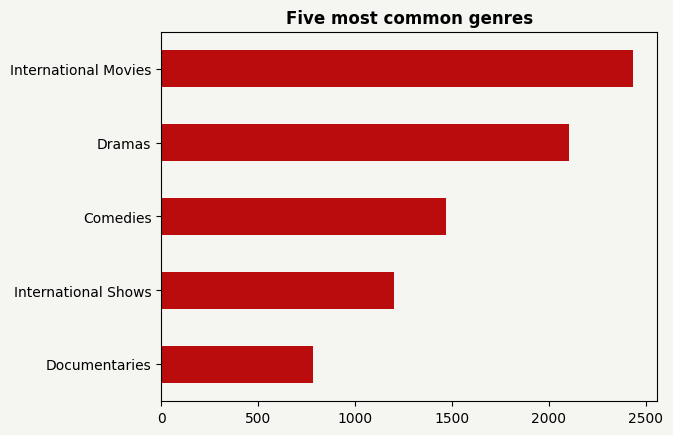

In [5]:
#Cast 'listed_in' to string
df['listed_in'] = df['listed_in'].astype(str)

#Dropping the null values and separating them
df_str = df.dropna(subset=['listed_in'])
div_genres = df_str['listed_in'].str.split(', ').explode()

div_genres = div_genres.replace(replace_dict)
genre_count = div_genres.value_counts().head(5)

fig, ax = plt.subplots()

#Creating the chart
fig.patch.set_facecolor(color=colours[0])
bar_colours = [colours[2]] * 10

genre_count_sort = genre_count.sort_values(ascending=True)
genre_count_sort.plot(kind='barh', color=bar_colours, ax=ax)

ax.set_title('Five most common genres', fontweight = 'bold')
ax.set_ylabel('')

ax.set_facecolor(colours[0])

plt.show()

+ ### **Segunda pregunta: Año con más pelis y series producidas**

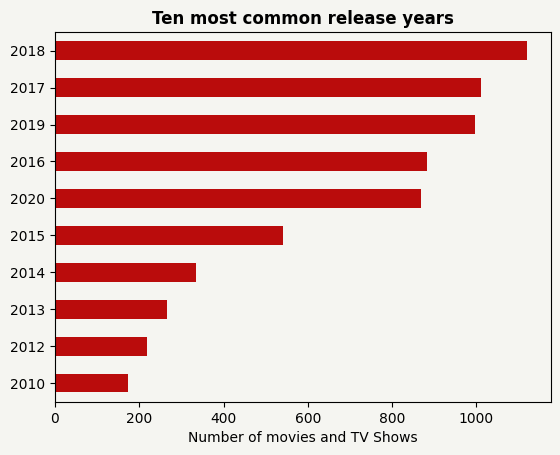

In [6]:
#Count release_year and plot the ten most common years
df['release_year'] = df['release_year'].astype(int)

release_year_count = df['release_year'].value_counts().head(10)
release_year_count = release_year_count.sort_values(ascending=True)

#Plotting it in a bar chart
fig, ax = plt.subplots()
fig.patch.set_facecolor(color=colours[0])
release_year_count.plot(kind='barh', color=colours[2], ax=ax)
ax.set_title('Ten most common release years', fontweight = 'bold')
ax.set_xlabel('Number of movies and TV Shows')
ax.set_ylabel('')
ax.set_facecolor(colours[0])

plt.show()

+ ### **Tercera pregunta: Países con más pelis y series producidas**

In [ ]:
#Converting to string and discarding nan values
df['country'] = df['country'].astype(str)
df = df[df['country'].str.lower() != 'nan']

#Counting the countries and plotting the ten most common
country_count = df['country'].value_counts().head(10)
country_count_sorted = country_count.sort_values(ascending=True)

#Plotting the graph of the most common countries in a horizontal bar chart
fig, ax = plt.subplots()
fig.patch.set_facecolor(color=colours[0])
bar_colours = [colours[2]] * 10
country_count_sorted.plot(kind='barh', color=bar_colours, ax=ax)
ax.set_title('Ten most common countries', fontweight = 'bold')
ax.set_xlabel('N° of movies & shows')
ax.set_ylabel('Countries')
plt.show()

+ ### **Pregunta 4: Series y películas según rating**

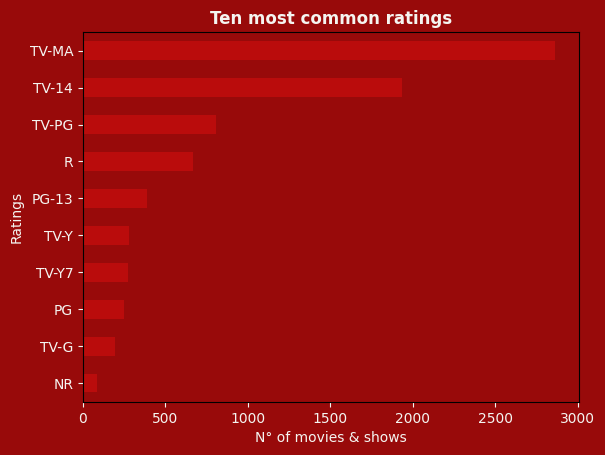

In [7]:
#Count the ratings and plot the ten most common
rating_count = df['rating'].value_counts().head(10)
rating_count_sorted = rating_count.sort_values(ascending=True)

#Plotting the graph of the most common ratings in a horizontal bar chart
fig, ax = plt.subplots()
fig.patch.set_facecolor(color=colours[3])
bar_colours = [colours[2]] * 10
rating_count_sorted.plot(kind='barh', color=bar_colours, ax=ax)

ax.set_title('Ten most common ratings', fontweight = 'bold', color=colours[0])
ax.set_facecolor(colours[3])

ax.set_xlabel('N° of movies & shows', color=colours[0])
ax.set_ylabel('Ratings', color = colours[0])

ax.tick_params(axis='x', colors=colours[0])
ax.tick_params(axis='y', colors=colours[0])

for label in ax.get_xticklabels():
    label.set_color(colours[0])
for label in ax.get_yticklabels():
    label.set_color(colours[0])

plt.show()


+ ### **Pregunta 5: Audiencia objetivo segun el origen de los shows**

In [ ]:
df_filled = df['country'].fillna('Unknown').str.split(', ').explode()
df_filled = df_filled.str.strip(',')

df_exploded = df_filled.explode('country')
uniqueCountryCount = df_exploded.value_counts()
print(uniqueCountryCount)
df_grouped = df_exploded.groupby(['country', 'rating']).size().reset_index(name='count')
df_pivot = df_grouped.pivot(index='country', columns='rating', values='count').fillna(0)

df_pivot.plot(kind='bar', stacked=True, color=[colours[1], colours[2], colours[3], colours[0]], figsize=(15, 10))


+ ### **Pregunta 8: Los actores más populares**

In [ ]:
cast_series = df['cast'].str.split(', ').explode()

# Count occurrences of each actor
actor_counts = cast_series.value_counts()

# Get the top 5 actors
top_5_actors = actor_counts.head(10)

plt.figure(figsize=(10,6))
top_5_actors.plot(kind='bar', color='red')
plt.title('Top 10 Most Popular Actors')
plt.xlabel('Actors')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()